# <font color='red'> Nearest Neighbors

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Data Generation

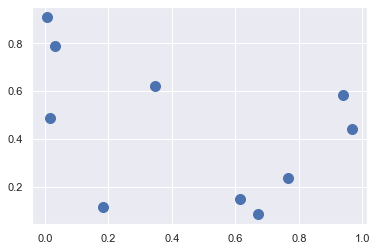

In [2]:
import random
random.seed(1234)
X = np.array([random.random() for i in range(20)])
X = X.reshape(10,2)
plt.scatter(X[:, 0], X[:, 1], s=100);

In [11]:
data = pd.DataFrame(X, columns = ['x-axis', 'y-axis'])
data

,x-axis,y-axis
0,0.966454,0.440733
1,0.007491,0.910976
2,0.939269,0.582228
3,0.671563,0.083938
4,0.766481,0.236810
5,0.030814,0.788773
6,0.346089,0.623281
7,0.615816,0.148555
8,0.183091,0.114413
9,0.014619,0.486752


## 1. Unsupervised K-Nearest Neighbors
https://scikit-learn.org/stable/modules/neighbors.html

- (distances) : distances between data points
- (indices) : associated index values — that can be used for detecting anomalies.

In [8]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances
indices

array([[0.        , 0.14408271, 0.28561085],
       [0.        , 0.1244089 , 0.42428429],
       [0.        , 0.14408271, 0.38622425],
       [0.        , 0.08534106, 0.17994175],
       [0.        , 0.17461095, 0.17994175],
       [0.        , 0.1244089 , 0.30245508],
       [0.        , 0.35606971, 0.35848697],
       [0.        , 0.08534106, 0.17461095],
       [0.        , 0.40867931, 0.43406983],
       [0.        , 0.30245508, 0.35848697]])

array([[0, 2, 4],
       [1, 5, 9],
       [2, 0, 4],
       [3, 7, 4],
       [4, 7, 3],
       [5, 1, 9],
       [6, 5, 9],
       [7, 3, 4],
       [8, 9, 7],
       [9, 5, 6]], dtype=int64)

In [29]:
pd.DataFrame(np.hstack((X, distances, indices.astype(int))), 
             columns = ['x', 'y', 'dis-01', 'dis-02', 'dis-03', 'knn-0', 'knn-1', 'knn-2'])

,x,y,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2
0,0.966454,0.440733,0.0,0.144083,0.285611,0.0,2.0,4.0
1,0.007491,0.910976,0.0,0.124409,0.424284,1.0,5.0,9.0
2,0.939269,0.582228,0.0,0.144083,0.386224,2.0,0.0,4.0
3,0.671563,0.083938,0.0,0.085341,0.179942,3.0,7.0,4.0
4,0.766481,0.236810,0.0,0.174611,0.179942,4.0,7.0,3.0
5,0.030814,0.788773,0.0,0.124409,0.302455,5.0,1.0,9.0
6,0.346089,0.623281,0.0,0.356070,0.358487,6.0,5.0,9.0
7,0.615816,0.148555,0.0,0.085341,0.174611,7.0,3.0,4.0
8,0.183091,0.114413,0.0,0.408679,0.434070,8.0,9.0,7.0
9,0.014619,0.486752,0.0,0.302455,0.358487,9.0,5.0,6.0


In [4]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.]])

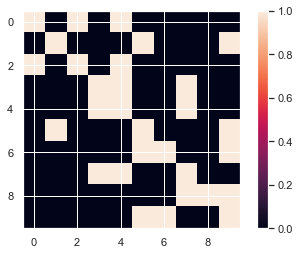

In [30]:
plt.imshow(nbrs.kneighbors_graph(X).toarray())
plt.colorbar();

## Hyperparameters 
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [5]:
nbrs.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'radius': 1.0}

### n_neighbors = 1 로 하면 Overfitting

KNeighborsClassifier(n_neighbors=15)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'uniform')")

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=15, weights='distance')

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

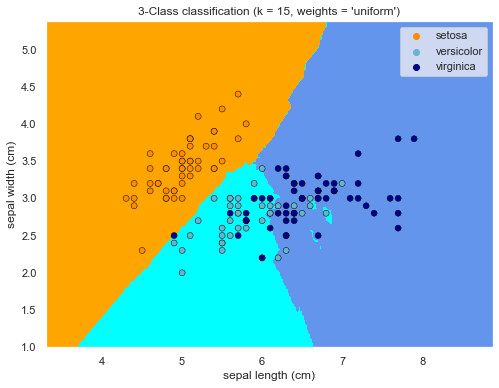

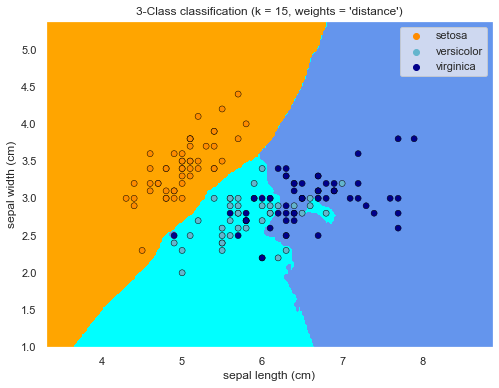

In [6]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

## 2. K-Nearest Neighbors Classification
### 2.1 Digits Classification Exercise
https://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

In [7]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


In [8]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## 2.2 Step by Step Diabetes Classification-KNN-detailed
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [9]:
#Loading the dataset
diabetes_data = pd.read_csv('../data/diabetes.csv')
#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

summary(diabetes_data)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
Pregnancies,int64,768,0,17
Glucose,int64,768,0,136
BloodPressure,int64,768,0,47
SkinThickness,int64,768,0,51
Insulin,int64,768,0,186
BMI,float64,768,0,248
DiabetesPedigreeFunction,float64,768,0,517
Age,int64,768,0,52
Outcome,int64,768,0,2


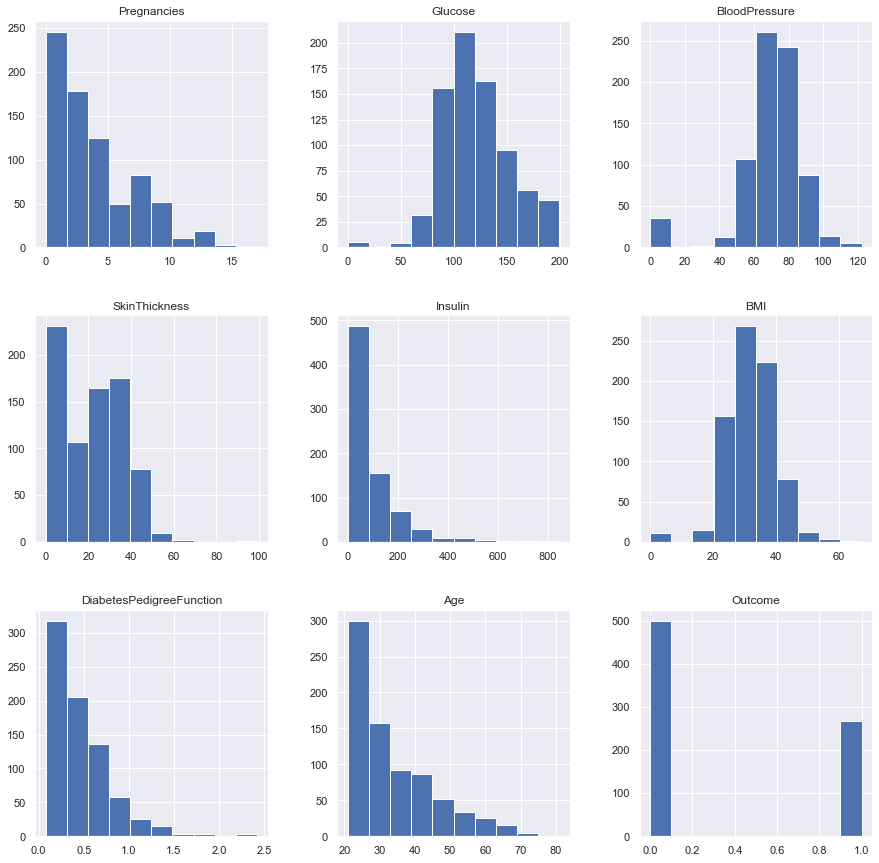

In [11]:
p = diabetes_data.hist(figsize = (15,15))

<Figure size 576x432 with 0 Axes>

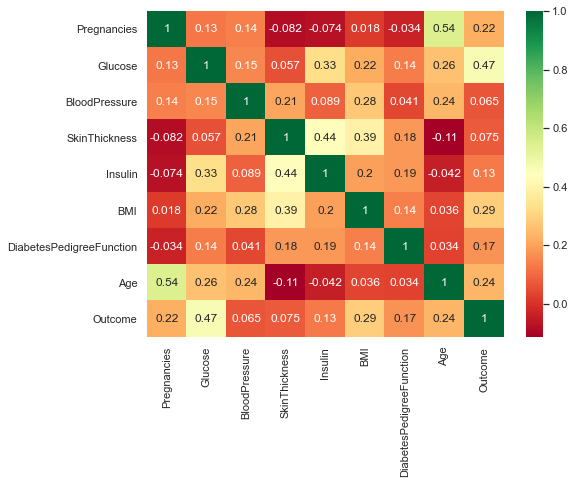

In [12]:
plt.figure(figsize=(8,6))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## <font color ='purple'> KNN 알고리즘은 instace의 거리를 기준으로 하기 떄문에 반드시 표준화가 필요

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data.drop(["Outcome"],axis = 1),),
                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                           'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data.Outcome

In [14]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=11)

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=11)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist= dict(n_neighbors=list(range(5,105, 2)),
                      weights=['uniform','distance'],
                      algorithm= ['ball_tree', 'kd_tree'],
                      leaf_size= list(range(5,50)))
np.random.seed(1357)

rs = RandomizedSearchCV(KNeighborsClassifier(), 
                        param_distributions= param_dist, cv=kf,
                        n_iter=64, scoring= 'recall', verbose=True)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.9s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=64,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19, 21, 23, 25, 27, 29,
                                                        31, 33, 35, 37, 39, 41,
                                                        43, 45, 47, 49, 51, 53,
                                                        55, 57, 59, 61, 

In [18]:
print('optimal train score: {:.3f}'.format(rs.best_score_)) 
print('test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.540
test score: 0.556
optimal parameter: {'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 8, 'algorithm': 'ball_tree'}


In [19]:
results = pd.DataFrame(rs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004854,0.001925,0.009531,0.001268,distance,83,38,ball_tree,"{'weights': 'distance', 'n_neighbors': 83, 'le...",0.283582,0.209302,0.409836,0.300907,0.082779,43
1,0.003003,0.000815,0.009348,0.000561,distance,79,28,ball_tree,"{'weights': 'distance', 'n_neighbors': 79, 'le...",0.283582,0.197674,0.442623,0.307960,0.101475,40
2,0.002807,0.000557,0.006808,0.000359,distance,87,47,kd_tree,"{'weights': 'distance', 'n_neighbors': 87, 'le...",0.283582,0.197674,0.409836,0.297031,0.087135,48
3,0.002333,0.000474,0.009257,0.000363,uniform,77,43,kd_tree,"{'weights': 'uniform', 'n_neighbors': 77, 'lea...",0.268657,0.174419,0.409836,0.284304,0.096744,52
4,0.002004,0.000006,0.009969,0.000042,uniform,75,24,kd_tree,"{'weights': 'uniform', 'n_neighbors': 75, 'lea...",0.268657,0.174419,0.393443,0.278839,0.089706,54


In [20]:
results = pd.DataFrame(rs.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score').round(4).head(10)

,params,mean_test_score,rank_test_score
6,"{'weights': 'distance', 'n_neighbors': 5, 'lea...",0.5396,1
12,"{'weights': 'distance', 'n_neighbors': 7, 'lea...",0.5357,2
19,"{'weights': 'uniform', 'n_neighbors': 7, 'leaf...",0.5269,3
50,"{'weights': 'uniform', 'n_neighbors': 7, 'leaf...",0.5269,3
17,"{'weights': 'distance', 'n_neighbors': 9, 'lea...",0.5192,5
47,"{'weights': 'distance', 'n_neighbors': 13, 'le...",0.5083,6
57,"{'weights': 'uniform', 'n_neighbors': 11, 'lea...",0.4889,7
40,"{'weights': 'uniform', 'n_neighbors': 17, 'lea...",0.4662,8
20,"{'weights': 'distance', 'n_neighbors': 27, 'le...",0.4187,9
7,"{'weights': 'uniform', 'n_neighbors': 31, 'lea...",0.4126,10


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       100
           1       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



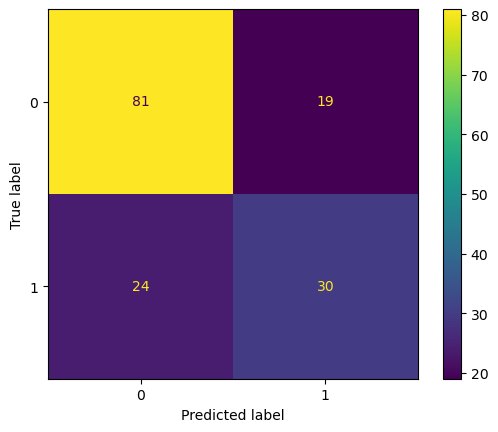

In [21]:
from sklearn.metrics import plot_confusion_matrix, classification_report
sns.reset_defaults()
plot_confusion_matrix(rs, X_test, y_test)
y_predict = rs.predict(X_test)
print(classification_report(y_test, y_predict))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

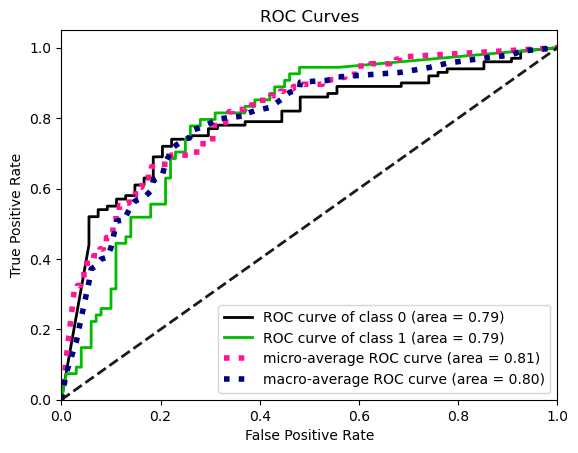

In [22]:
import scikitplot as skplt 
y_probas = rs.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

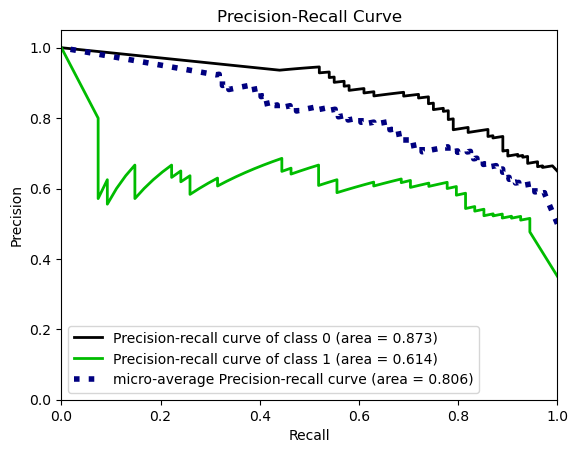

In [23]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

## 3. K-Nearest Neighbors Regression
### n_neighbors가 적을수록 과적합(overfitting) 가능성이 높아짐
https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'uniform')")

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'distance')")

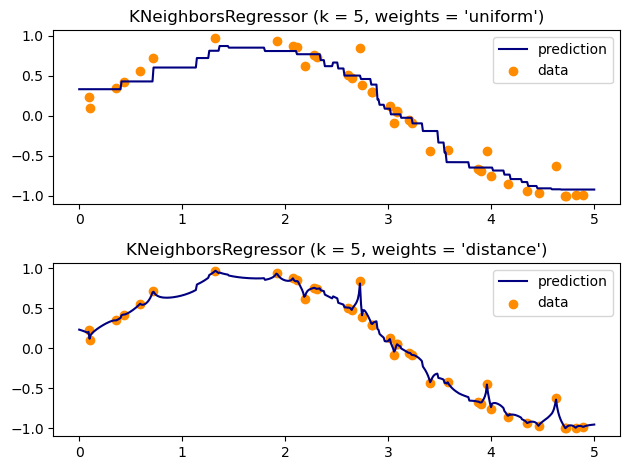

In [24]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

## 4. KNN Imputer
Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [25]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

# End